In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#DATA INGESTION

##DATA EXTRACTION

In [54]:
dfcustomer = pd.read_csv('/content/Case Study - Customer.csv', delimiter = ";", decimal = ",")
dfproduct = pd.read_csv('/content/Case Study - Product.csv', delimiter = ";", decimal = ",")
dfstore = pd.read_csv('/content/Case Study - Store.csv', delimiter = ";", decimal = ",")
dftransaction = pd.read_csv('/content/Case Study - Transaction.csv', delimiter = ";", decimal = ",")

##DATA TRANSFORMATION

In [55]:
dfcustomer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [56]:
dfproduct.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [57]:
dfstore.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [58]:
dftransaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [59]:
dfcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


In [60]:
dfcustomer[dfcustomer.isnull().any(axis=1)]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4.00
415,416,27,1,NaN,3.43
442,443,33,1,NaN,9.28


In [61]:
dfcustomer_modus = dfcustomer[(dfcustomer['Age'] >= 27) & (dfcustomer['Age'] <= 33)]

In [62]:
dfcustomer_modus["Marital Status"].value_counts()

Married    64
Single     10
Name: Marital Status, dtype: int64

In [63]:
value_nan = "Married"
dfcustomer['Marital Status'] = dfcustomer['Marital Status'].fillna(value_nan)

In [64]:
dfcustomer[dfcustomer["CustomerID"].isin([443, 416, 10])]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,Married,4.00
415,416,27,1,Married,3.43
442,443,33,1,Married,9.28


In [65]:
dfproduct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [66]:
dfstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


In [67]:
dftransaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


Data Merge for machine learning

In [68]:
from datetime import datetime
dftransaction['Date'] = pd.to_datetime(dftransaction['Date'],format='%d/%m/%Y')
dftransaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [69]:
dfpredict = dftransaction.groupby('Date').agg(total_qty=('Qty', 'sum'))
dfpredict

,total_qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


In [70]:
dfpredict.columns

Index(['total_qty'], dtype='object')

In [71]:
dfclustering_merge1 = pd.merge(dftransaction, dfcustomer, on='CustomerID')
dfclustering_merge2 = pd.merge(dfclustering_merge1, dfstore, on='StoreID')
dfcluster = pd.merge(dfclustering_merge2, dfproduct, on='ProductID')
dfcluster

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR47252,190,2022-07-14,P6,18000,1,18000,2,34,1,Married,8.85,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Cashew,18000
5016,TR13595,268,2022-09-03,P6,18000,4,72000,2,49,1,Single,5.18,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Cashew,18000
5017,TR92165,365,2022-03-08,P6,18000,3,54000,2,28,0,Single,6.05,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Cashew,18000
5018,TR27651,15,2022-07-07,P6,18000,3,54000,2,30,0,Married,4.52,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,Cashew,18000


In [72]:
dfbytransaction = dfcluster.groupby('CustomerID').agg(Transaction_count =('TransactionID', 'size'), Qty_sum = ('Qty', 'sum'), Total_amount = ('TotalAmount', 'sum'), Age =('Age', 'mean'))

In [73]:
dfbytransaction

,Transaction_count,Qty_sum,Total_amount,Age
CustomerID,,,,
1,17,60,623300,55.0
2,13,57,392300,60.0
3,15,56,446200,32.0
4,10,46,302500,31.0
5,7,27,268600,58.0
...,...,...,...,...
443,16,59,485100,33.0
444,18,62,577700,53.0
445,18,68,587200,51.0


#Machine Learning

In [74]:
! pip install pmdarima

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [76]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dfpredict['total_qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.448086
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


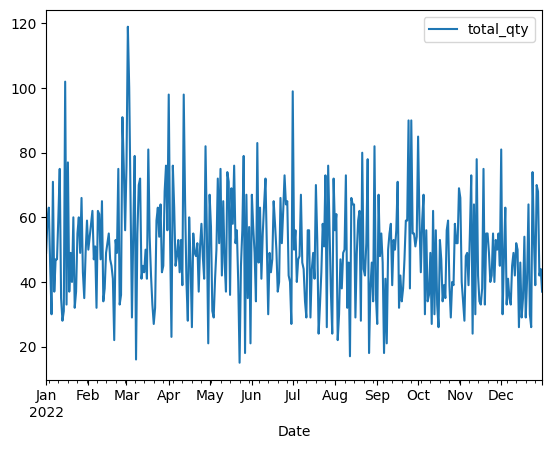

In [77]:
dfpredict.plot()
plt.show()

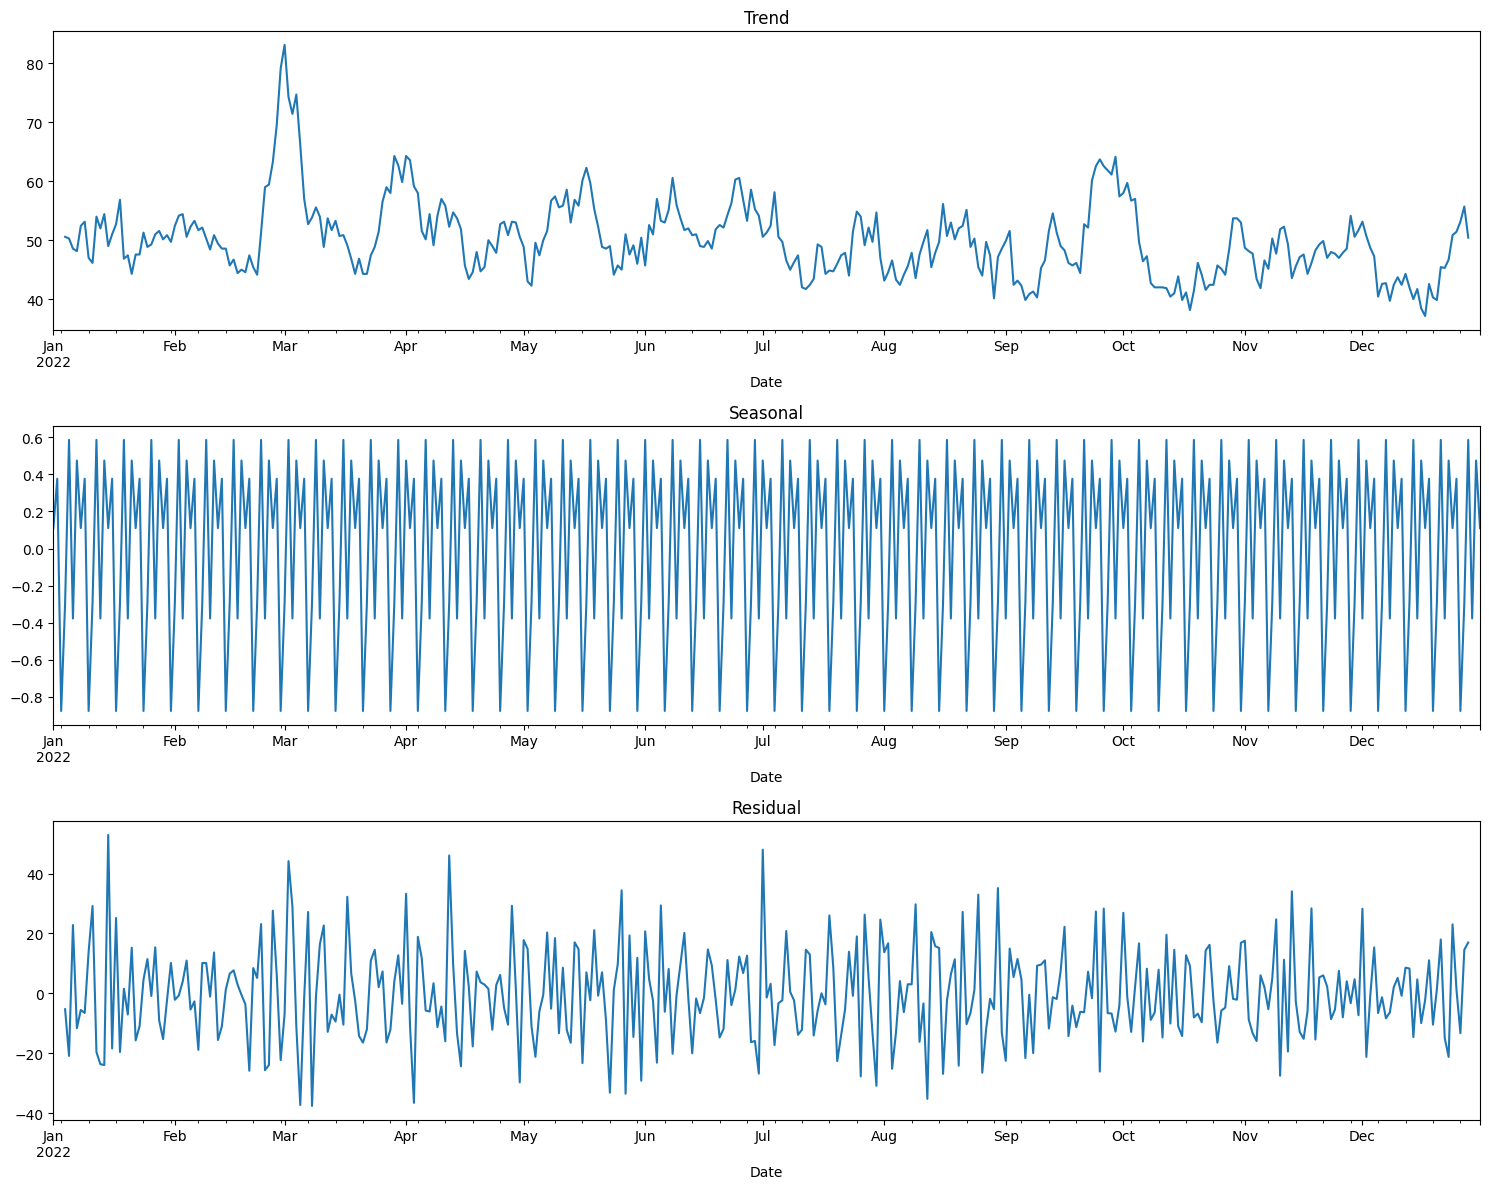

In [78]:
decompose = seasonal_decompose(dfpredict)

fig,ax = plt.subplots(3,1,figsize=(15,12))
decompose.trend.plot(ax=ax[0])
ax[0].set_title('Trend')
decompose.seasonal.plot(ax=ax[1])
ax[1].set_title('Seasonal')
decompose.resid.plot(ax=ax[2])
ax[2].set_title('Residual')

plt.tight_layout()
plt.show()

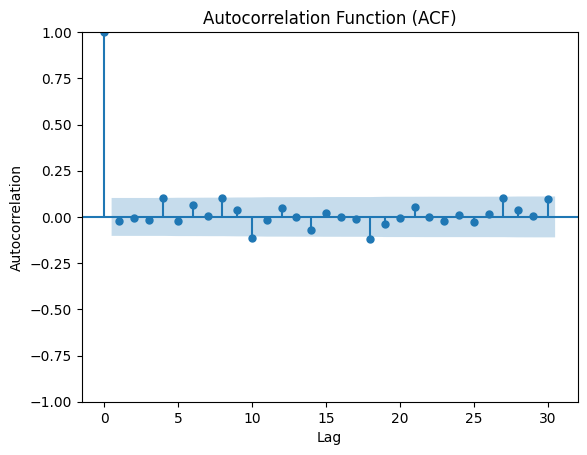

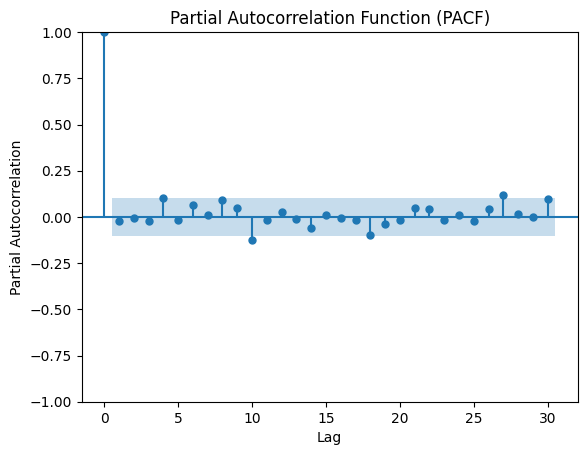

In [79]:
# Plot ACF using default method
plot_acf(dfpredict, lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF using ywm method
plot_pacf(dfpredict, lags=30,  method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [80]:
# Split the data into training and testing sets
cut_off = round(dfpredict.shape[0] * 0.8)
df_train = dfpredict[:cut_off]
df_test = dfpredict[cut_off:]

# Check the shapes of the train and test sets
print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)

Training set shape: (292, 1)
Testing set shape: (73, 1)


In [81]:
# check which ARIMA models best suit using auto ARIMA
auto_arima_model = auto_arima(df_train['total_qty'], seasonal=False, stepwise=False, suppress_warnings=True, trace = True)
auto_arima_model.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3158.558, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2971.825, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2858.751, Time=0.38 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2818.103, Time=0.42 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2758.656, Time=0.44 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2742.865, Time=0.55 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2688.721, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2504.937, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2506.794, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2508.733, Time=0.44 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2510.161, Time=0.87 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2616.108, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2506.798, Time=0.31 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1249.469
Date:                Sun, 29 Oct 2023   AIC                           2504.937
Time:                        01:52:39   BIC                           2515.968
Sample:                    01-01-2022   HQIC                          2509.356
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.08e-05   3.25e+04      0.000       1.000       1.000
ma.L1         -0.9898      0.015    -66.556      0.000      -1.019      -0.961
sigma2       298.6887     22.254     13.422      0.000     255.072     342.306
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                18.30
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.53
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
# Function to calculate RMSE
def rmse(y_actual, y_pred):
  print(f'RMSE value {mean_squared_error(y_actual, y_pred)**0.5}')

# Function to eval machine learning modelling
def eval(y_actual, y_pred):
  print(f'MAE value {mean_absolute_error(y_actual, y_pred)}')

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [84]:
# ARIMA Modelling
y = df_train['total_qty']
model = ARIMA(y, order = (1, 0, 1))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [85]:
# Model Prediction
pred = model.get_forecast(len(df_test))
pred_df = pred.conf_int()
pred_df['predictions'] = model.predict(start = pred_df.index[0], end = pred_df.index[-1])
pred_df.index = df_test.index
pred_out = pred_df['predictions']


In [86]:

# Evaluate the model
rmse(df_test['total_qty'], pred_out)
eval(df_test['total_qty'], pred_out)

RMSE value 14.50728284249015
MAE value 12.219789018845061


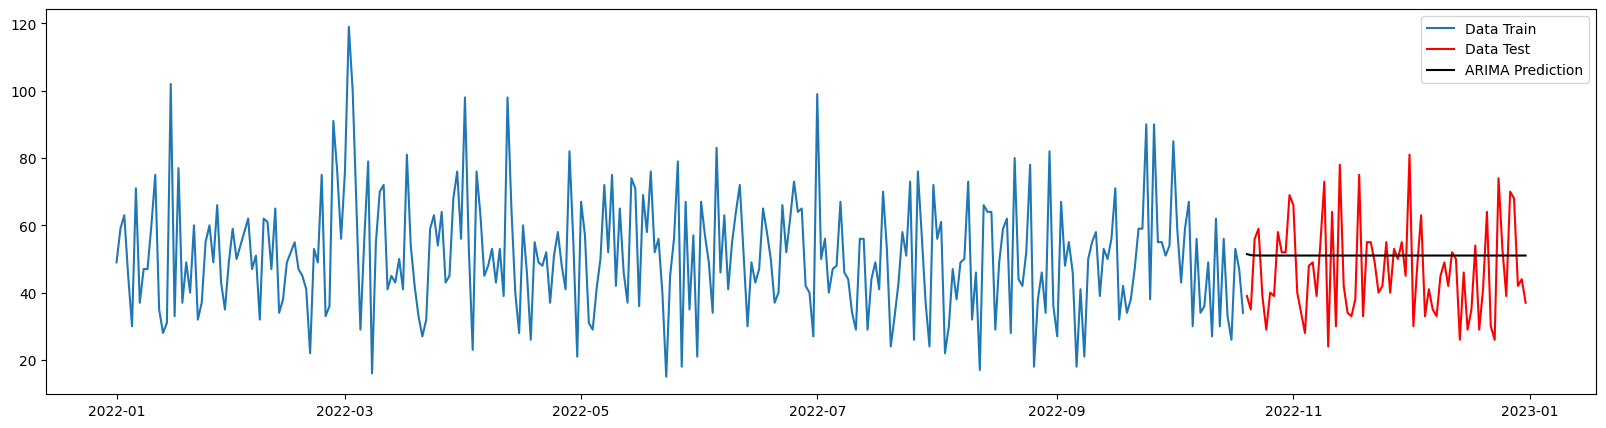

In [87]:
# Plot
plt.figure(figsize=(20, 5))
plt.plot(df_train['total_qty'], label='Data Train')
plt.plot(df_test['total_qty'], color='red', label='Data Test')
plt.plot(pred_out, color='black', label='ARIMA Prediction')
plt.legend()

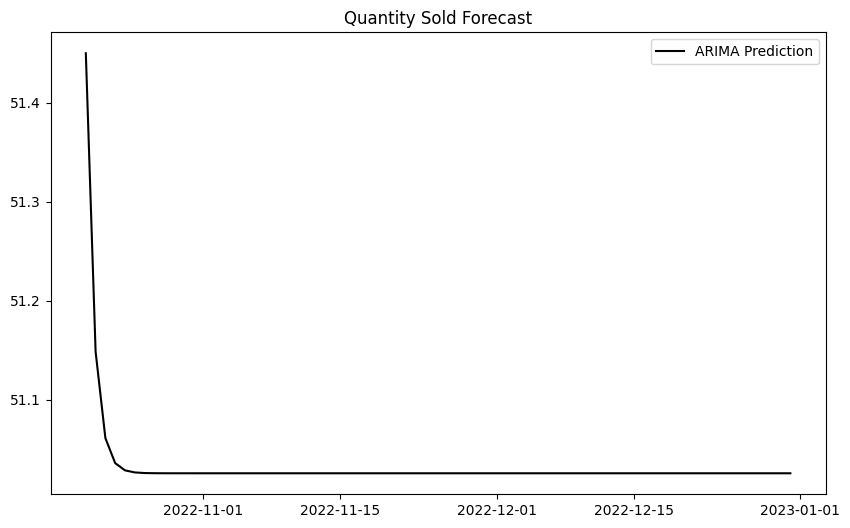

In [88]:
# Plot and Visualize Predicted Values for Quantity Sold
plt.figure(figsize=(10, 6))
plt.plot(pred_out, color='black', label='ARIMA Prediction')
plt.title('Quantity Sold Forecast')
plt.legend()
plt.show()

## CLUSTERING COSTUMER

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [90]:
dfcluster.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500


In [91]:
# Identified columns with high correlation
dfcluster.corr()

<ipython-input-91-9e8f350d4879>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcluster.corr()


,CustomerID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude,Price_y
CustomerID,1.000000,-0.016423,-0.009755,-0.024915,0.004129,-0.025952,-0.009947,0.005783,0.002278,-0.003122,-0.016423
Price_x,-0.016423,1.000000,-0.353640,0.440632,-0.032863,0.014693,0.010705,0.001196,-0.029008,0.018652,1.000000
Qty,-0.009755,-0.353640,1.000000,0.621129,0.014365,-0.027768,-0.010542,-0.028425,-0.004170,0.004807,-0.353640
TotalAmount,-0.024915,0.440632,0.621129,1.000000,-0.010722,-0.016900,-0.008774,-0.025350,-0.029938,0.025437,0.440632
StoreID,0.004129,-0.032863,0.014365,-0.010722,1.000000,-0.003872,-0.000189,0.001613,0.471852,-0.094943,-0.032863
Age,-0.025952,0.014693,-0.027768,-0.016900,-0.003872,1.000000,-0.033183,0.486692,0.009266,0.015951,0.014693
Gender,-0.009947,0.010705,-0.010542,-0.008774,-0.000189,-0.033183,1.000000,-0.071443,-0.006051,-0.001183,0.010705
Income,0.005783,0.001196,-0.028425,-0.025350,0.001613,0.486692,-0.071443,1.000000,0.015518,0.004385,0.001196
Latitude,0.002278,-0.029008,-0.004170,-0.029938,0.471852,0.009266,-0.006051,0.015518,1.000000,-0.395995,-0.029008
Longitude,-0.003122,0.018652,0.004807,0.025437,-0.094943,0.015951,-0.001183,0.004385,-0.395995,1.000000,0.018652


In [92]:
dfc1 = dfcluster.groupby('CustomerID').agg(Transaction_count =('TransactionID', 'size'), Total_amount = ('TotalAmount', 'sum'), Age =('Age', 'mean'))
dfc1

,Transaction_count,Total_amount,Age
CustomerID,,,
1,17,623300,55.0
2,13,392300,60.0
3,15,446200,32.0
4,10,302500,31.0
5,7,268600,58.0
...,...,...,...
443,16,485100,33.0
444,18,577700,53.0
445,18,587200,51.0


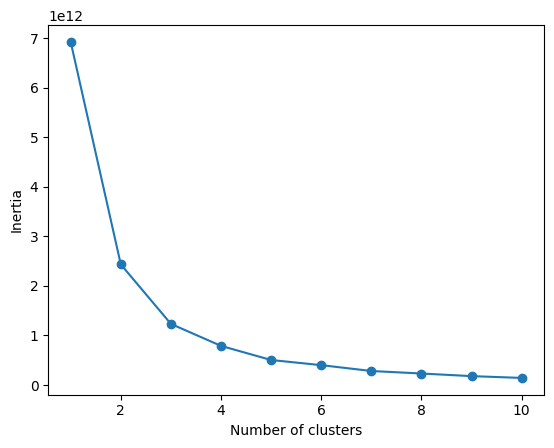

In [101]:

# create an empty list to store the inertia values
inertia = []

# create a range of k values to test
k_range = range(1, 11)

# fit KMeans for each k value and append the inertia to the list
for k in k_range:
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(dfc1)
    inertia.append(model.inertia_)

# plot the inertia values against k values
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [93]:
model_kmeans = KMeans(n_clusters=3)

In [98]:
x = dfc1[["Total_amount","Age"]]

In [99]:
model_kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [100]:
model_kmeans.labels_

array([1, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0,
       0, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 2,
       2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0,
       0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0,
       1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2,
       0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 2,
       0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1,

In [102]:
dfc1['cluster'] = model_kmeans.labels_

In [103]:
dfc1

,Transaction_count,Total_amount,Age,cluster
CustomerID,,,,
1,17,623300,55.0,1
2,13,392300,60.0,0
3,15,446200,32.0,0
4,10,302500,31.0,2
5,7,268600,58.0,2
...,...,...,...,...
443,16,485100,33.0,1
444,18,577700,53.0,1
445,18,587200,51.0,1


In [107]:
dfc1[dfc1['cluster'] == 0]

,Transaction_count,Total_amount,Age,cluster
CustomerID,,,,
2,13,392300,60.0,0
3,15,446200,32.0,0
6,10,459100,23.0,0
9,10,349200,33.0,0
14,12,398500,58.0,0
...,...,...,...,...
436,10,348400,51.0,0
438,14,457200,36.0,0
440,12,395200,40.0,0


In [110]:
dfc1[dfc1['cluster'] == 0].describe()

,Transaction_count,Total_amount,Age
count,186.000000,186.000000,186.000000
mean,11.752688,384003.225806,40.306452
std,1.937711,42092.441259,12.411750
min,7.000000,314400.000000,18.000000
25%,10.000000,351125.000000,31.000000
50%,12.000000,383800.000000,38.500000
75%,13.000000,415375.000000,50.000000
max,16.000000,463800.000000,69.000000


In [108]:
dfc1[dfc1['cluster'] == 1]

,Transaction_count,Total_amount,Age,cluster
CustomerID,,,,
1,17,623300,55.0,1
7,17,498800,31.0,1
8,14,542100,37.0,1
10,14,478000,34.0,1
12,16,582500,2.0,1
...,...,...,...,...
430,14,501600,55.0,1
434,13,509900,37.0,1
443,16,485100,33.0,1


In [111]:
dfc1[dfc1['cluster'] == 1].describe()

,Transaction_count,Total_amount,Age
count,90.000000,90.000000,90.000000
mean,15.322222,548162.222222,39.788889
std,2.134930,70435.131648,13.268612
min,11.000000,470200.000000,2.000000
25%,14.000000,496775.000000,30.250000
50%,15.000000,528850.000000,39.000000
75%,17.000000,581475.000000,51.000000
max,21.000000,846700.000000,61.000000


In [109]:
dfc1[dfc1['cluster'] == 2]

,Transaction_count,Total_amount,Age,cluster
CustomerID,,,,
4,10,302500,31.0,2
5,7,268600,58.0,2
11,7,247300,42.0,2
21,10,299900,52.0,2
25,3,92100,24.0,2
...,...,...,...,...
432,5,199400,35.0,2
437,7,222800,33.0,2
439,7,113800,35.0,2


In [112]:
dfc1[dfc1['cluster'] == 2].describe()

,Transaction_count,Total_amount,Age
count,171.000000,171.000000,171.000000
mean,8.508772,241425.730994,39.210526
std,2.132020,52225.981070,13.140512
min,3.000000,92100.000000,0.000000
25%,7.000000,206100.000000,30.000000
50%,9.000000,250000.000000,38.000000
75%,10.000000,282800.000000,48.500000
max,14.000000,312400.000000,72.000000


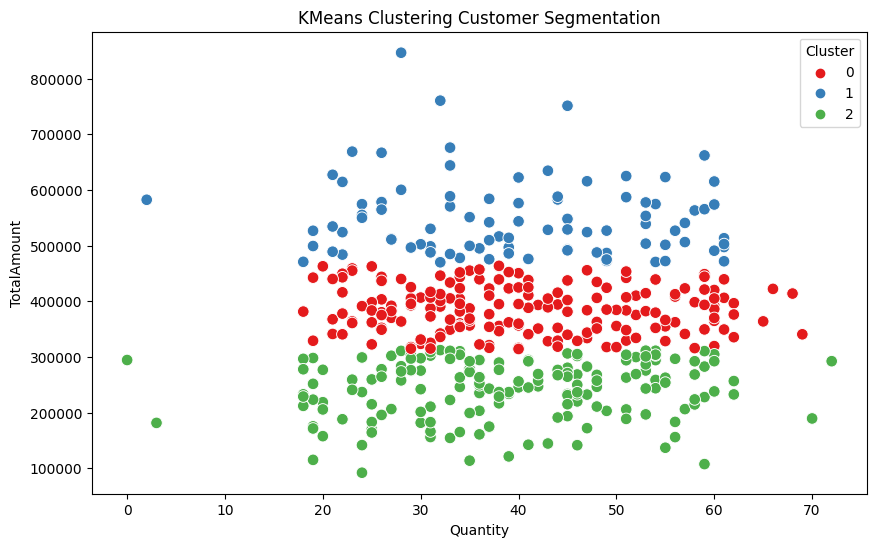

In [106]:
# Convert 'cluster' column to categorical data type
dfc1['cluster'] = dfc1['cluster'].astype('category')

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total_amount', data=dfc1, hue='cluster', palette='Set1', s=70)
plt.xlabel('Quantity')
plt.ylabel('TotalAmount')
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()